# Ford GoBike Data Explanation
## by Oyelayo Seye



## Investigation Overview

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process which is a project part of the Udacity Data Analysis Nanodegree course.

In the first part I used Python visualization libraries to systematically wrangle and explore the fordgobike dataset, starting from plots of single variables and building up to plots of multiple variables.

In this second part of the project, I present the interesting relationships, patterns and insights that I discovered in the first part.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset features data relevant to Ford's GoBike bikeshare program with regards, to date, time, distance, location, and use...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_ford = pd.read_csv('df_ford_clean')
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,True,2019-02-28,17,Thursday,February,2019-03-01,8,Friday,March
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,True,2019-02-28,18,Thursday,February,2019-03-01,6,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,True,2019-02-28,12,Thursday,February,2019-03-01,5,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,True,2019-02-28,17,Thursday,February,2019-03-01,4,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,True,2019-02-28,23,Thursday,February,2019-03-01,0,Friday,March


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1: Amount Of User Types)

> This is a graph that shows the proportion count of user type. We find that there is  a large porportion of subscribers than the customers.The subscriber is about 8 times of the customer

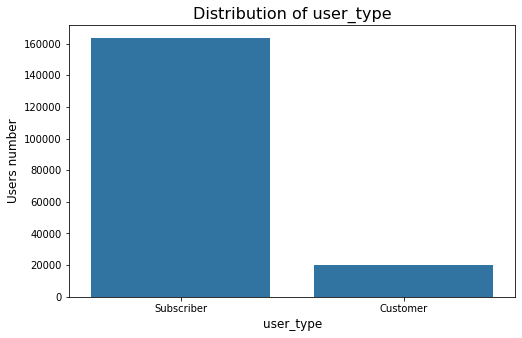

In [3]:
def bar(data, x, title, xlabel, ylabel):
    plt.figure(figsize = [8,5])
    color = sb.color_palette()[0]
    order_base = df_ford[x].value_counts().index
    sb.countplot(data = data, x = x, color = color, order = order_base);
    plt.title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 12);
    plt.ylabel(ylabel, fontsize = 12);
    
bar(df_ford, 'user_type', 'Distribution of user_type', 'user_type', 'Users number')

## (Visualization 1: User Types By Gender)
> The male subscribers are more than the female subscribers and the male customers are more than female customers

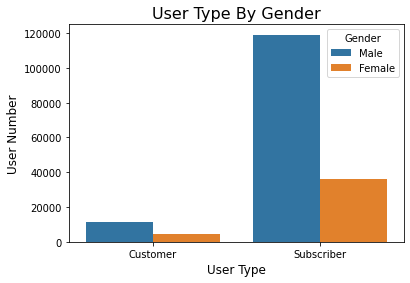

In [4]:
df_ford_sub = df_ford.loc[df_ford['member_gender'].isin(['Male', 'Female'])]
sb.countplot(data = df_ford_sub, x = 'user_type', hue = 'member_gender' );
plt.title('User Type By Gender', fontsize = 16);
plt.xlabel('User Type', fontsize = 12);
plt.ylabel('User Number', fontsize = 12);
plt.legend(title = 'Gender');

## (Visualization 2 : Trip duration (sec) per user type))

> The customers use the bikes for longer periods than subscribers, even though the subscribers are much higher in terms of numbers. By checking the two distributions, we can observe that the two have the lowest distribution, falling under 2500 secs, with customers' own higher

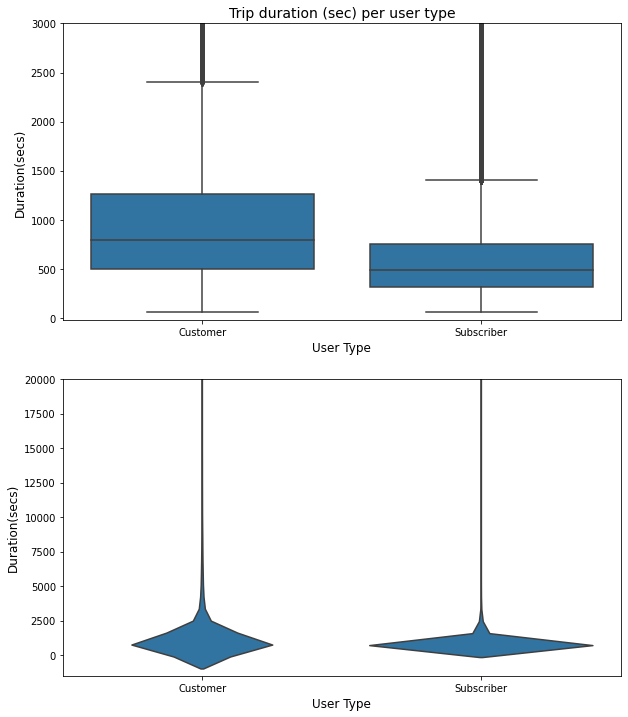

In [5]:
plt.figure(figsize = [10,12])
plt.subplot(2,1,1)
color_base = sb.color_palette()[0]
sb.boxplot(data = df_ford, x = 'user_type', y = 'duration_sec', color = color_base)
plt.title('Trip duration (sec) per user type', fontsize = 14)
plt.xlabel('User Type', fontsize = 12);
plt.ylabel('Duration(secs)', fontsize = 12);
plt.ylim(-20,3000);

plt.subplot(2,1,2)
color_base = sb.color_palette()[0]
sb.violinplot(data = df_ford, x = 'user_type', y = 'duration_sec', inner = None, color = color_base);
plt.xlabel('User Type', fontsize = 12);
plt.ylabel('Duration(secs)', fontsize = 12);
plt.ylim(-1500,20000);

## (Visualization 3: time spent per day per 'User Type')
>  Customers would use this on their non-working days as leisure, but especially at a longer time frame, as we have the highest duration seconds for Saturday and Sunday.

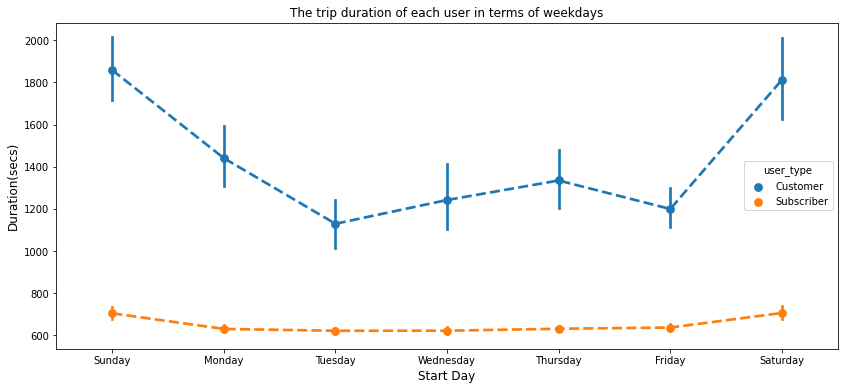

In [6]:
order_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
D_order =  pd.api.types.CategoricalDtype(ordered=True, categories = day_order)
def graph_user(n,xvar, yvar, cvar, graph):
    if  graph == 'line':
        plt.figure(figsize=(14,6))
        graph = sb.pointplot(x=xvar, y=yvar, hue=cvar, data=n,linestyles='dashed', order=order_day)  
        plt.xlabel('Start Day', fontsize = 12);
        plt.ylabel('Duration(secs)', fontsize = 12);
    else:
        plt.figure(figsize=(14,6))
        graph = sb.stripplot(x=xvar, y=yvar,hue=cvar,data=n, order=day_order, jitter=0.35,dodge=True)
        plt.xlabel('Start Day', fontsize = 12);
        plt.ylabel('Duration(secs)', fontsize = 12);
         
    plt.title('The trip duration of each user in terms of weekdays')
graph_user(df_ford, 'start_day', 'duration_sec', 'user_type', 'line')

## Visualization 4: Weekly usage of the bike share system per user type
> Among the customers, we find that Sunday is not utilized the most but is among the subscribers. Among the subscribers, we find that Monday is not utilized as much as it is for customers. Among the subscibers, we find that Tuesday is not utilized the most but is among the customers. This clearly shows, subscribers and customers have a very different life and workstyle.

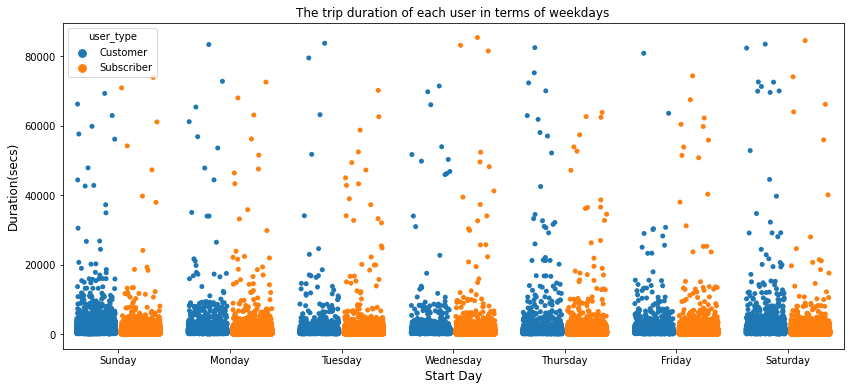

In [7]:
graph_user(df_ford, 'start_day', 'duration_sec', 'user_type', 'point')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 